In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)


In [3]:
df.to_csv('module_5_auto.csv')

In [4]:
#lets use only numeric data
df = df._get_numeric_data ()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
from IPython.display import display
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [6]:
def DistributionPlot (RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure (figsize = (width, height))
    
    ax1 = sns.distplot (RedFunction, hist = False, color = "r", label = RedName)
    ax2 = sns.distplot (BlueFunction, hist = False, color = 'b', label = BlueName, ax = ax1)
    
    plt.title (Title)
    plt.xlabel ('Price (in dollars)')
    plt.ylabel ('Proportion of cars')
    
    plt.show()
    plt.close()

In [7]:
def PollyPlot (xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure (figsize = (width, height))
    
    #trainning data
    #testing data
    #lr - linear regression object
    # poly transform: polynomial transformation object
    
    
    xmax = max ([xtrain.values.max(), xtest.values.max() ])
    xmin = min ([xtrain.values.min(), xtest.values.min() ])
    
    x =  np.arange (xmin, xmax, 0.1)
    plt.plot (xtrain, y_train, 'ro', label = 'Training Data')
    plt.plot (xtest, y_test, 'go', label = "Test Data")
    plt.plot (x, lr.predict (poly_transform.fit_transform (x.reshape(-1,1))), label = 'Predicted function')
    plt.ylim ([-10000, 60000])
    plt.ylabel ('Price')
    plt.legend ()

In [8]:
#important step is to split data in training and testing data
y_data = df ['price']
#drop price data in x data
x_data=df.drop('price',axis=1)

In [9]:
# Now we randomly split our data into training and testing data using the function
#train_test_split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15,
                                                    random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#create linear regression object
lre = LinearRegression ()

In [12]:
# fir the model using horsepower feature
lre.fit (x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#Calcurlate R^2 on the test data
lre.score (x_test[['horsepower']], y_test)

0.707688374146705

In [14]:
# we can see R^2 is smaller using the tet data
lre.score (x_train[['horsepower']], y_train)

0.6449517437659684

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# parameter cv=4 defines # of folds, this time 4

Rcross = cross_val_score (lre, x_data[['horsepower']], y_data, cv = 4)
# the default scoring is R^2; each element is the array has the average R^2 values in the fold:

In [17]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [18]:
#we can calculate average and standard devisation of our estimate
print ("The mean of the folds are", Rcross.mean(), "and the standard deviation is", Rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.2911839444756025


In [19]:
# we can use negatve sqared error as score by setting the parameter "scoring" metric to 
#'neg_mean_squared_error'

-1 * cross_val_score (lre, x_data [['horsepower']], y_data, cv = 4, 
                      scoring = 'neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

In [20]:
# use 'cross_val_predict' to predict output. The function splits data in # of folds, 
#using one fold to get a prediction while the rest of the folds are used as test data.
from sklearn.model_selection import cross_val_predict

In [21]:
#we input the object, the feature (horsepower), the target data y_data.

yhat = cross_val_predict (lre, x_data [['horsepower']], y_data, cv = 4)
yhat [0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [22]:
# Part2 Overfitting, Underfitting and model selection

#Let's create multiple linear regression models and train model using several features

lr = LinearRegression ()
lr.fit (x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
#prediction using training data
y_hat_train = lr.predict (x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
y_hat_train [0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [24]:
#prediction using test data
y_hat_test = lr.predict (x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
y_hat_test [0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [25]:
# let's perform model evaluation using test and train data separately.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/armands/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


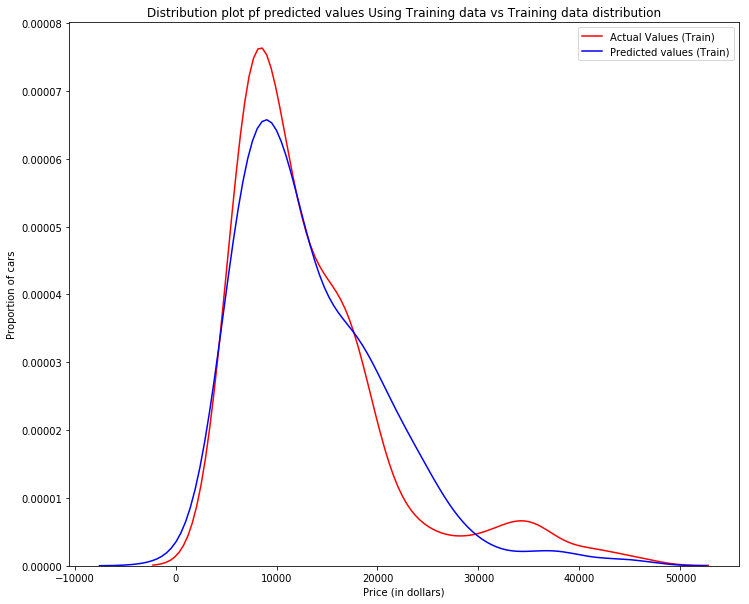

In [26]:
#examine distribution of predicted values of the traininig data

Title = "Distribution plot pf predicted values Using Training data vs Training data distribution"
DistributionPlot (y_train, y_hat_train, "Actual Values (Train)", "Predicted values (Train)",
                  Title)

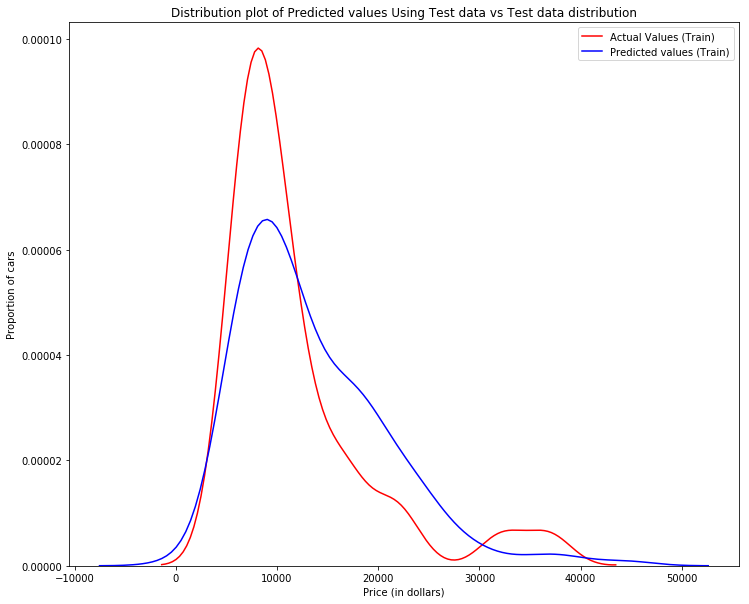

In [27]:
Title = "Distribution plot of Predicted values Using Test data vs Test data distribution"
DistributionPlot (y_test, y_hat_test, "Actual Values (Train)", "Predicted values (Train)",
                  Title)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
#overfitting occures when the model fits the noise, not underlying process.
#let's create degree 5 polynomial model. Let's use 55% data for training, rest for testing

x_train, x_test, y_train, y_test = train_test_split (x_data, y_data, test_size = 0.45,
                                                     random_state = 0)

In [32]:
pr = PolynomialFeatures (degree = 5)
x_train_pr = pr.fit_transform (x_train [['horsepower']])
x_test_pr = pr.fit_transform (x_test [['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [33]:
# let's create linear regression model poly and train it
poly = LinearRegression ()
poly.fit (x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# we can see output for our model using the method predict and assign values to yhat
yhat = poly.predict (x_test_pr)
yhat [0:5]

array([ 6728.73877623,  7308.06173582, 12213.81078747, 18893.1290908 ,
       19995.81407813])

In [35]:
# let's take 5 predicted values and compare with actual targets
print ('Predicted values:', yhat [0:4])
print ('True values:', y_test[0:4].values)

Predicted values: [ 6728.73877623  7308.06173582 12213.81078747 18893.1290908 ]
True values: [ 6295. 10698. 13860. 13499.]


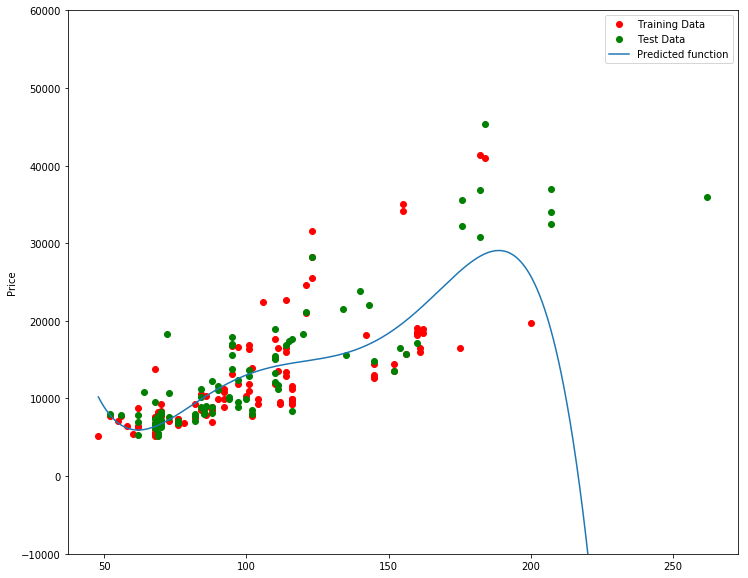

In [36]:
#we will use 'PollyPlot' that we defined in beginning of the lab to display the training data, 
# testing data and predicted function
PollyPlot (x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [37]:
#R^2 of the training data
poly.score (x_train_pr, y_train)

0.5567716902028981

In [38]:
poly.score (x_test_pr, y_test)

-29.87162132967278

In [39]:
#lower the R^2 the worse model. Negative is sign of overfitting

Text(3, 0.75, 'Maximum R^2')

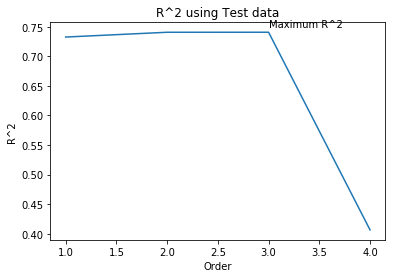

In [40]:
# How r^2 score changes on test data for different order polynomials

Rsqu_test = []
order = [1, 2, 3, 4]

for n in order:
    pr = PolynomialFeatures (degree = n)
    
    x_train_pr = pr.fit_transform (x_train [['horsepower']] )
    x_test_pr = pr.fit_transform (x_test [['horsepower']] )
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append (lr.score(x_test_pr, y_test))
    
plt.plot (order, Rsqu_test)
plt.xlabel ('Order')
plt.ylabel ('R^2')
plt.title ('R^2 using Test data')
plt.text (3, 0.75, 'Maximum R^2')
    

In [41]:
#following function will be used in the next section

def f (order, test_data):
    x_train, x_test, y_train, y_test = train_test_split (x_data, y_data, test_size = test_data, 
                                                        random_state = 0)
    pr = PolynomialFeatures (degree = order)
    x_train_pr = pr.fit_transform (x_train [['horsepower']])
    x_test_pr = pr.fit_transform (x_test [['horsepower']])
    poly = LinearRegression ()
    poly.fit(x_train_pr, y_train)
    PollyPlot (x_train [['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [42]:
#following inteface allow to experiement with different polynomial orders and different amounts
# of data

interact (f, order = (0, 6, 1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [44]:
# Part 3 ridge regression
pr = PolynomialFeatures (degree = 2)
x_train_pr = pr.fit_transform (x_train [['horsepower', 'curb-weight', 
                                         'engine-size', 'highway-mpg']])
x_test_pr = pr.fit_transform (x_test [['horsepower', 'curb-weight', 
                                         'engine-size', 'highway-mpg']])

In [45]:
from sklearn.linear_model import Ridge


In [46]:
RidgeModel = Ridge (alpha = 0.1)

In [47]:
# fit model using methode fit
RidgeModel.fit (x_train_pr, y_train)

/home/armands/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.053428e-16
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
#obtain prediction
yhat = RidgeModel.predict (x_test_pr)

In [49]:
print ('Predicted:', yhat [0:4])
print ('Test set', y_test [0:4].values)

Predicted: [ 6308.50636657 10409.96072663 20534.49224708 19277.30770253]
Test set [ 6295. 10698. 13860. 13499.]


In [51]:
#select value alpha that minimizes test error
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array (range (0, 1000))
for alfa in ALFA:
    RidgeModel = Ridge (alpha = alfa)
    RidgeModel.fit (x_train_pr, y_train)
    Rsqu_test.append (RidgeModel.score (x_test_pr, y_test))
    Rsqu_train.append (RidgeModel.score (x_train_pr, y_train))

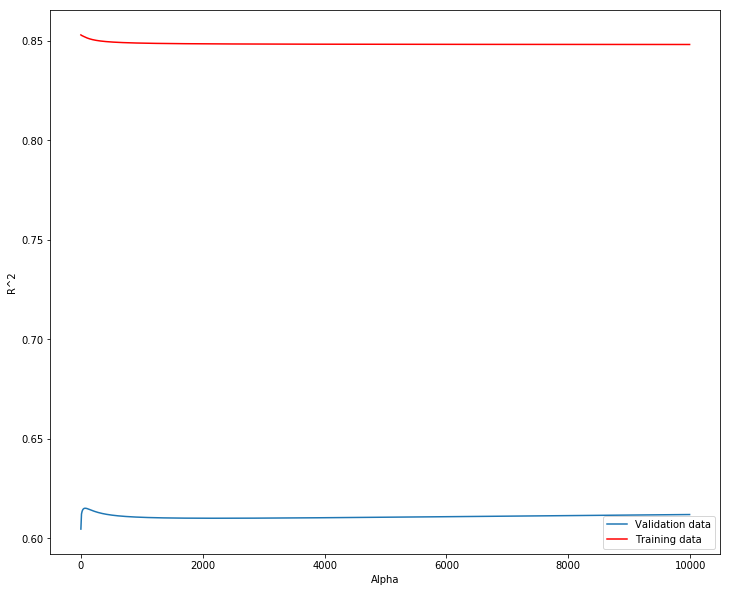

In [52]:
#plot R^2 for different alphas

width = 12
height = 10
plt.figure (figsize = (width, height))

plt.plot (ALFA, Rsqu_test, label = 'Validation data')
plt.plot (ALFA, Rsqu_train, 'r', label = 'Training data')
plt.xlabel ('Alpha')
plt.ylabel ('R^2')
plt.legend()

In [53]:
#Part 4 Grid search

from sklearn.model_selection import GridSearchCV

In [54]:
# Create disctionary of parameter values
parameters1 =  [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [55]:
# Create Ridge region object
RR = Ridge ()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
Grid1 = GridSearchCV (RR, parameters1, cv = 4)

In [58]:
# fit the model
Grid1.fit (x_data[['horsepower','curb-weight', 'engine-size', 'highway-mpg']], y_data)

/home/armands/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
# obtain estimted best RR and assign it to variable BestRR

BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
BestRR.score (x_test[['horsepower','curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149